In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using SVM


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
y_pred = svm_classifier.predict(X_test)


## Using Evaluation Metrics

Accuracy =  88.49765258215963 %
Precision =  0.7857414816905463
Recall =  0.7807295441993718
F1-score =  0.7831780336426218


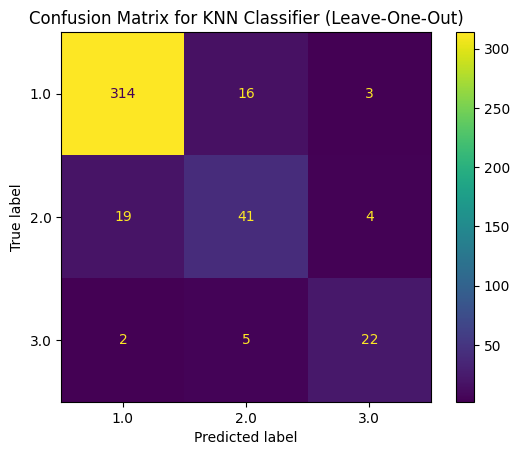

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.66      0.64      0.65        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.88       426
   macro avg       0.79      0.78      0.78       426
weighted avg       0.88      0.88      0.88       426



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


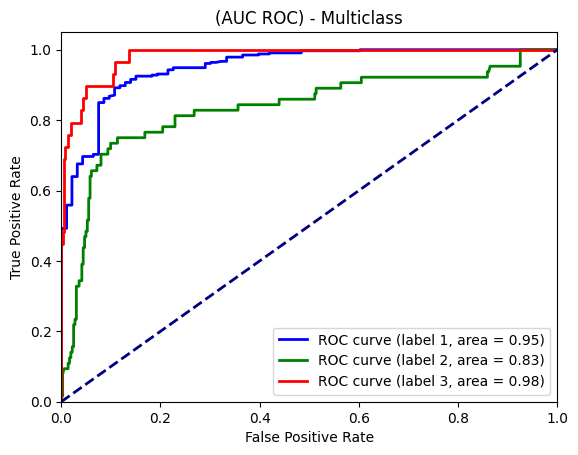

In [9]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = svm_classifier.decision_function(X_test)

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


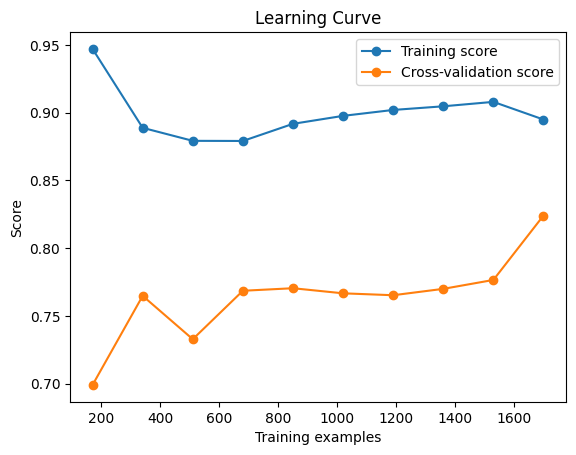

In [10]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

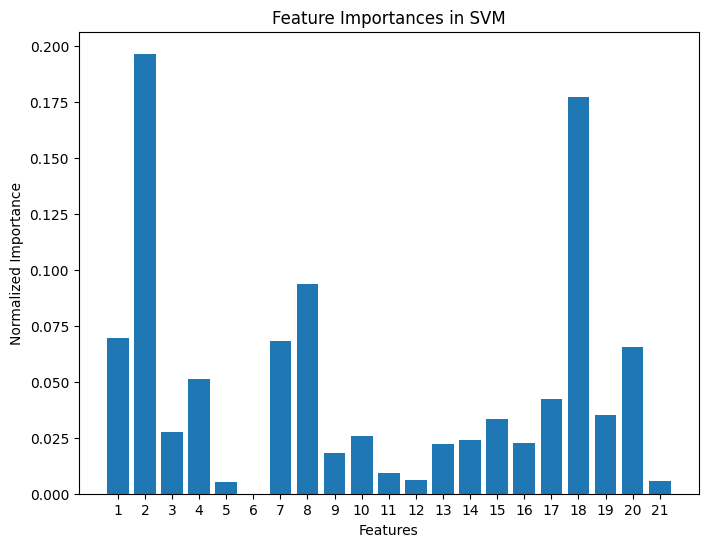

In [11]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


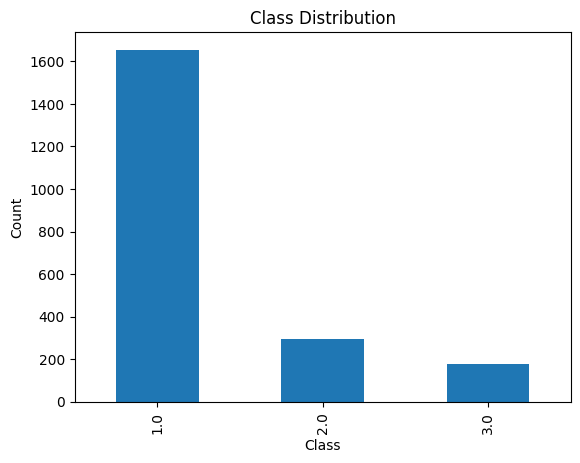

In [12]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


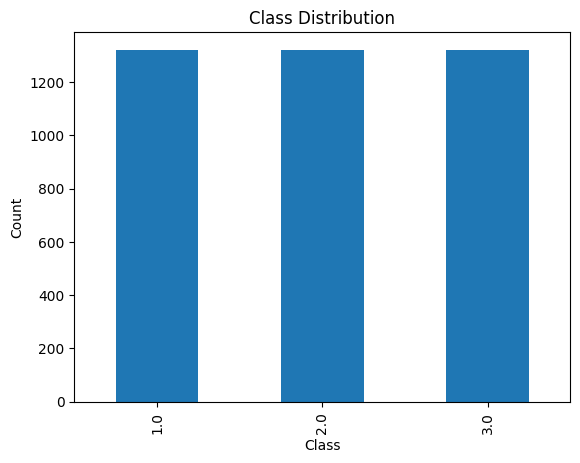

In [14]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using SVM

In [15]:

svm_after_smote = SVC(kernel='linear') 
svm_after_smote.fit(X_resampled, y_resampled)
y_pred_res = svm_after_smote.predict(X_test)


## Using Evaluation Metrics

Accuracy =  85.2112676056338 %
Precision =  0.7192644772432005
Recall =  0.8192821053812432
F1-score =  0.7573936156214637


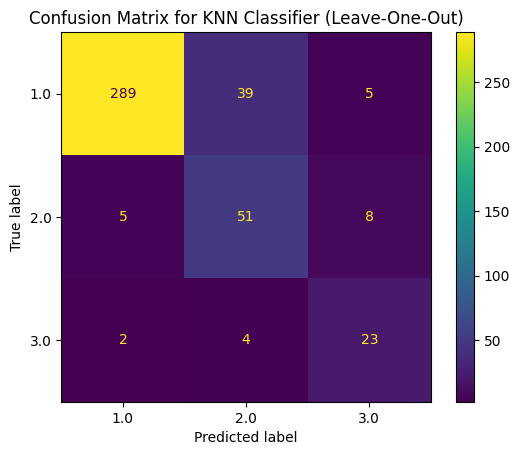

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.87      0.92       333
         2.0       0.54      0.80      0.65        64
         3.0       0.64      0.79      0.71        29

    accuracy                           0.85       426
   macro avg       0.72      0.82      0.76       426
weighted avg       0.89      0.85      0.86       426



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred_res) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred_res,average='macro'))
print("Recall = ", recall_score(y_test, y_pred_res,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred_res,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred_res)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_res))


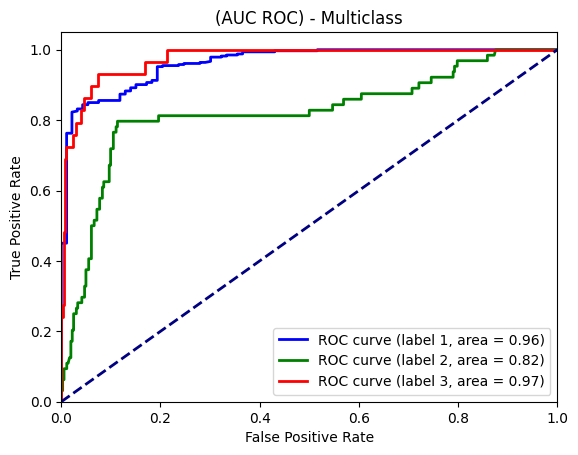

In [17]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = svm_after_smote.decision_function(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


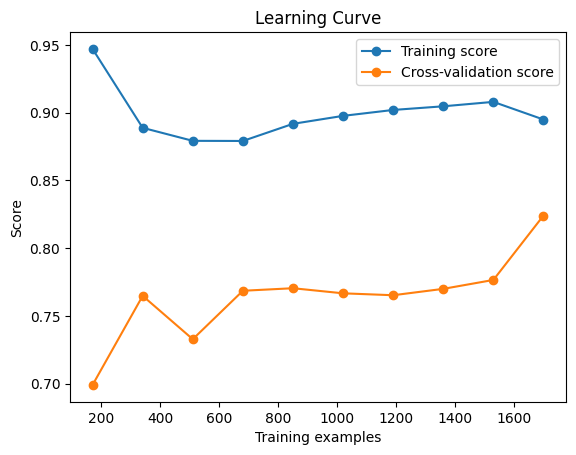

In [18]:
train_sizes, train_scores, test_scores = learning_curve(svm_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

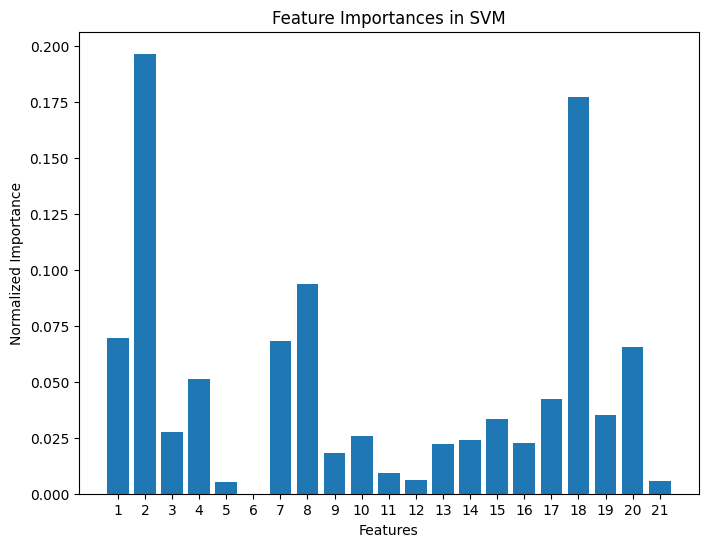

In [19]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()
